In [1]:
from google.colab import drive

drive.mount('/content/drive')
%cd drive
%cd MyDrive
%cd ML_Practicals

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/ML_Practicals


# Scikit-Learn

In [2]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [3]:
X_train = np.array(["new york is a hell of a town",
                    "new york was originally dutch",
                    "the big apple is great",
                    "new york is also called the big apple",
                    "nyc is nice",
                    "people abbreviate new york city as nyc",
                    "the capital of great britain is london",
                    "london is in the uk",
                    "london is in england",
                    "london is in great britain",
                    "it rains a lot in london",
                    "london hosts the british museum",
                    "new york is great and so is london",
                    "i like london better than new york"])

y_train_text = [["new york"],["new york"],["new york"],["new york"],["new york"],
                ["new york"],["london"],["london"],["london"],["london"],
                ["london"],["london"],["new york","london"],["new york","london"]]

In [4]:
lb = preprocessing.MultiLabelBinarizer()

In [5]:
nltk.download('stopwords')

stop_words = stopwords.words('english')

classifier = make_pipeline(
              CountVectorizer(),
						  TfidfTransformer(),
						  #SelectKBest(chi2, k=4),
						  OneVsRestClassifier(SGDClassifier())
            )

#combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# random_state = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_text, test_size=0.30, random_state=0)

In [7]:
Y = lb.fit_transform(y_train)
Y_test=lb.transform(y_test)

classifier.fit(X_train, Y)
y_score = classifier.fit(X_train, Y).decision_function(X_test)
print("y_score : ", y_score)

y_score :  [[ 6.46688708 -2.94331982]
 [-0.03272739  0.36711622]
 [-3.54469402  2.33046985]
 [ 1.74506487 -0.31242893]
 [-4.06154579  0.96645198]]


In [8]:
predicted = classifier.predict(X_test)
all_labels = lb.inverse_transform(predicted)

In [9]:
print("accuracy : ", accuracy_score(Y_test, predicted))
print("micro f-measure ", f1_score(Y_test, predicted, average='micro'))

for item, labels in zip(X_test, all_labels):
    print('%s => %s' % (item, ', '.join(labels)))

accuracy :  0.8
micro f-measure  0.8000000000000002
london is in england => london
the capital of great britain is london => new york
nyc is nice => new york
london hosts the british museum => london
the big apple is great => new york


In [10]:
precision_micro, recall_micro, _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision_micro = average_precision_score(Y_test, y_score,average="micro")

print("precision : ",(precision_micro),"\nrecall : ", (recall_micro), "\naverage precision : ", (average_precision_micro))

precision :  [0.83333333 0.8        1.         1.         1.         1.
 1.        ] 
recall :  [1.  0.8 0.8 0.6 0.4 0.2 0. ] 
average precision :  0.9666666666666666


In [11]:
n_classes = Y.shape[1]
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    print('Y-test : ', Y_test[:,i])
    print("Y-score : ", y_score[:,i])
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    print('Precision : ', precision[i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])
    print('Average Precision : ', average_precision[i], '\n')

Y-test :  [1 1 0 1 0]
Y-score :  [ 6.46688708 -0.03272739 -3.54469402  1.74506487 -4.06154579]
Precision :  [1. 1. 1. 1.]
Average Precision :  1.0 

Y-test :  [0 0 1 0 1]
Y-score :  [-2.94331982  0.36711622  2.33046985 -0.31242893  0.96645198]
Precision :  [1. 1. 1.]
Average Precision :  1.0 



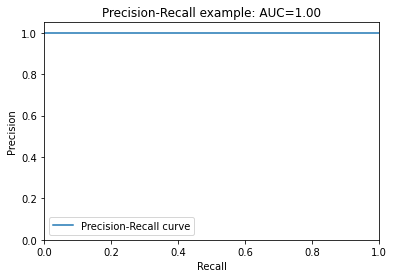

In [12]:
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

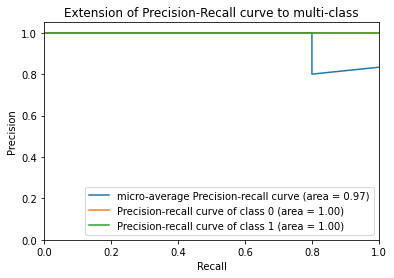

In [13]:
plt.clf()
plt.plot(recall_micro, precision_micro,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision_micro))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='Precision-recall curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

# TensorFlow & Keras

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

%matplotlib inline

In [15]:
# !unzip -q "09_movie_posters.zip"

train = pd.read_csv("Multi_Label_dataset/train.csv")  
train = train.head(3500)
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           3500 non-null   object
 1   Genre        3500 non-null   object
 2   Action       3500 non-null   int64 
 3   Adventure    3500 non-null   int64 
 4   Animation    3500 non-null   int64 
 5   Biography    3500 non-null   int64 
 6   Comedy       3500 non-null   int64 
 7   Crime        3500 non-null   int64 
 8   Documentary  3500 non-null   int64 
 9   Drama        3500 non-null   int64 
 10  Family       3500 non-null   int64 
 11  Fantasy      3500 non-null   int64 
 12  History      3500 non-null   int64 
 13  Horror       3500 non-null   int64 
 14  Music        3500 non-null   int64 
 15  Musical      3500 non-null   int64 
 16  Mystery      3500 non-null   int64 
 17  N/A          3500 non-null   int64 
 18  News         3500 non-null   int64 
 19  Reality-TV   3500 non-null 

In [17]:
img_w = 224
img_h = 224
img_c = 3
train_image = []

for i in tqdm(range(len(train))):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg', target_size=(img_w, img_h, img_c))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 3500/3500 [00:18<00:00, 184.28it/s]


In [18]:
X.shape

(3500, 224, 224, 3)

In [19]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(3500, 25)

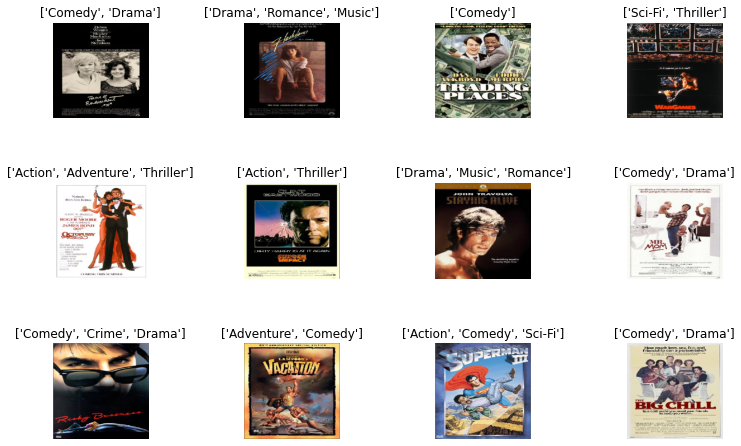

In [20]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=1)

rows = 3
cols = 4

for i in range(0,12):
  fig.add_subplot(rows, cols, i+1)
  plt.title(train['Genre'][i])
  plt.axis('off')
  plt.imshow(X[i])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [22]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(img_w,img_h,img_c)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 53, 53, 32)        0

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
44/44 [==============================] - 21s 152ms/step - loss: 0.4089 - accuracy: 0.1225 - val_loss: 0.3536 - val_accuracy: 0.2100
Epoch 2/10
44/44 [==============================] - 4s 95ms/step - loss: 0.3027 - accuracy: 0.2179 - val_loss: 0.2529 - val_accuracy: 0.2100
Epoch 3/10
44/44 [==============================] - 4s 94ms/step - loss: 0.2801 - accuracy: 0.2493 - val_loss: 0.2603 - val_accuracy: 0.2100
Epoch 4/10
44/44 [==============================] - 4s 94ms/step - loss: 0.2692 - accuracy: 0.2411 - val_loss: 0.2426 - val_accuracy: 0.2100
Epoch 5/10
44/44 [==============================] - 5s 108ms/step - loss: 0.2635 - accuracy: 0.2543 - val_loss: 0.2449 - val_accuracy: 0.2100
Epoch 6/10
44/44 [==============================] - 4s 95ms/step - loss: 0.2628 - accuracy: 0.2275 - val_loss: 0.2420 - val_accuracy: 0.2100
Epoch 7/10
44/44 [==============================] - 4s 95ms/step - loss: 0.2574 - accuracy: 0.2479 - val_loss: 0.2425 - val_accuracy: 0.2100
Epoch 8/10

In [26]:
def predict_genre(img):
  classes = np.array(train.columns[2:])
  proba = model.predict(img.reshape(1,img_w, img_h, img_c))
  top_3 = np.argsort(proba[0])[:-4:-1]
  for i in range(3):
      print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
  plt.imshow(img)

In [27]:
!wget https://i.pinimg.com/originals/0c/35/6c/0c356c40c29f3b8e69eeb5c918a6eef7.jpg

--2022-09-26 06:34:00--  https://i.pinimg.com/originals/0c/35/6c/0c356c40c29f3b8e69eeb5c918a6eef7.jpg
Resolving i.pinimg.com (i.pinimg.com)... 146.75.28.84, 2a04:4e42:78::84
Connecting to i.pinimg.com (i.pinimg.com)|146.75.28.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 455919 (445K) [image/jpeg]
Saving to: ‘0c356c40c29f3b8e69eeb5c918a6eef7.jpg’

0c356c40c29f3b8e69e 100%[===================>] 445.23K  --.-KB/s    in 0.01s   

2022-09-26 06:34:00 (33.0 MB/s) - ‘0c356c40c29f3b8e69eeb5c918a6eef7.jpg’ saved [455919/455919]



Drama (0.521)
Comedy (0.404)
Crime (0.278)


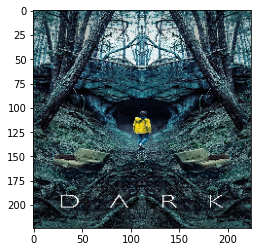

In [28]:
img = image.load_img('0c356c40c29f3b8e69eeb5c918a6eef7.jpg',target_size=(img_w, img_h, img_c))
img = image.img_to_array(img)
img = img/255

predict_genre(img)